In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm, shapiro, ttest_1samp
import seaborn as sns
from scipy import stats
from numpy import *

In [30]:
# Attributes
attribute = ["Daerah","SumbuUtama","SumbuKecil","Keunikan","AreaBulatan","Diameter","KadarAir","Keliling","Bulatan","Ransum","Kelas"]
data = pd.read_csv("../data/Gandum.csv", names = attribute)
data

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
1,5781,128.288875,58.470846,0.890095,5954,85.793926,0.674090,316.756,0.724041,2.194066,1
2,4176,109.348294,49.837688,0.890098,4277,72.918093,0.596231,260.346,0.774227,2.194088,1
3,4555,114.427991,52.151207,0.890105,4706,76.155145,0.776641,279.606,0.732159,2.194158,1
4,4141,108.701190,49.457349,0.890499,4236,72.611879,0.633180,260.478,0.766961,2.197877,1
5,5273,122.747868,55.757848,0.890876,5431,81.937733,0.669842,302.730,0.723031,2.201446,1
...,...,...,...,...,...,...,...,...,...,...,...
496,5083,120.083450,54.821580,0.889709,5179,80.447975,0.534827,286.377,0.778850,2.190441,2
497,4432,112.367050,51.294914,0.889726,4550,75.119889,0.601194,270.823,0.759344,2.190608,2
498,5020,119.873742,54.718545,0.889740,5104,79.947874,0.528421,285.799,0.772311,2.190733,2
499,4035,107.311728,48.930802,0.889996,4150,71.676506,0.584698,258.503,0.758791,2.193132,2


# Soal 1

In [ ]:
ans = {}

for att in attribute:
    temp = {}
    temp["Mean"] = data[att].mean()
    temp["Median"] = data[att].median()
    temp["Modus"] = np.bincount(data[att]).argmax()
    temp["Std"] = data[att].std()
    temp["Var"] = data[att].var()
    temp["Minimum"] = data[att].min()
    temp["Maximum"] = data[att].max()
    temp["Range"] = data[att].max()-data[att].min()
    quartile = data[att].quantile([.25, .5, .75])
    temp["25%"] = quartile[.25]
    temp["50%"] = quartile[.5]
    temp["75%"] = quartile[.75]
    q75, q25 = np.percentile(data[att], [75 ,25])
    temp["IQR"] = q75 - q25
    temp["Skew"] = data[att].skew()
    temp["Kurtosis"] = data[att].kurtosis()

    ans[att] = temp

ans = pd.DataFrame(ans)
ans

# Soal 2

In [ ]:
for att in attribute:
    if (att == "Kelas"):
        continue
        
    x_axis = data[att] # kolom yang dituju
    plt.boxplot(x_axis)
    plt.title(att)
    plt.show()
    
    plt.hist(x_axis)
    plt.title("plot kolom "+ att)
    plt.xlabel(att)
    plt.ylabel("count")
    plt.show()
    



# Soal 3

In [ ]:
alpha = 0.05
for att in attribute:
    ax = sns.displot(data[att], kde=True)
    
    stat, p = shapiro(data[att])

    if (p > alpha):
        plt.title(att + "\n" + "Terdistribusi Normal\n" + "p-val : " + str("%.30f" % p), loc="left")
    else:
        plt.title(att + "\n" + "Tidak Terdistribusi Normal\n" + "p-val : " + str("%.30f" % p), loc="left")
    
    

# Soal 4.a

In [ ]:
u = 4700
z_alpha = 1.645
avg = data["Daerah"].mean()
std = data["Daerah"].std()
n = len(data.index)
z = (avg - u) / (std/(n**(1/2)))
print("Z = " + str(z))

if(z > z_alpha):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")


plt.figure()
plt.boxplot(data["Daerah"])
plt.title("Boxplot Daerah")
plt.show()

pval = norm.sf(abs(z))
print("P-values = " + str(pval))

# Soal 4.b

In [ ]:
u = 116
z_alpha = 1.645
avg = data["SumbuUtama"].mean()
std = data["SumbuUtama"].std()
n = len(data.index)
z = (avg - u) / (std/(n**(1/2)))
print("Z = " + str(z))

if(z > z_alpha):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")


plt.figure()
plt.boxplot(data["SumbuUtama"])
plt.title("Boxplot SumbuUtama")
plt.show()

pval = norm.sf(abs(z))
print("P-values = " + str(pval))

# Soal 4.c

In [ ]:
u = 50
z_alpha = 1.729
dataSK = data.head(20)
avg = dataSK["SumbuKecil"].mean()
std = dataSK["SumbuKecil"].std()
n = len(dataSK.index)
z = (avg - u) / (std/(n**(1/2)))
print("Z = " + str(z))

if(z > z_alpha):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")


plt.figure()
plt.boxplot(data["SumbuKecil"])
plt.title("Boxplot SumbuKecil")
plt.show()

# pval = norm.sf(abs(z))
pval = ttest_1samp(dataSK["SumbuKecil"], 50)
print("P-values = " + str(pval.pvalue))

# Soal 4.d

In [ ]:
u = 0.15
z_alpha = 1.960
dataD85 = data[data["Diameter"] > 85]
x = len(dataD85.index)
n = len(data.index)
p_hat = x/n
z = (p_hat - u) / ((u*(1-u)/n)**(1/2))
print("Z = " + str(z))

if(z < -z_alpha or z > z_alpha):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")


plt.figure()
plt.boxplot(data["Diameter"])
plt.title("Boxplot Diameter")
plt.show()

pval = norm.sf(abs(z))
print("P-values = " + str(pval))

# Soal 4.e

In [ ]:
u = 0.05
z_alpha = 1.960
dataK100 = data[data["Keliling"] < 100]
x = len(dataK100.index)
n = len(data.index)
p_hat = x/n
z = (p_hat - u) / ((u*(1-u)/n)**(1/2))
print("Z = " + str(z))

if(z < -z_alpha or z > z_alpha):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")


plt.figure()
plt.boxplot(data["Keliling"])
plt.title("Boxplot Keliling")
plt.show()

pval = norm.sf(abs(z))
print("P-values = " + str(pval))

# Soal 5.a

Z = 17.013036648485464
P-values = 6.574024595618948e-65
Hipotesis H0 ditolak


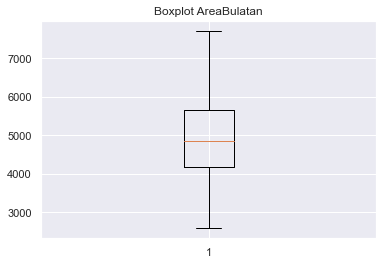

In [56]:
col = "AreaBulatan"
data1 = data[col][0:250]
data2 = data[col][250:500]

z_alpha = 1.645

n1 = len(data1)
n2 = len(data2)

sd1 = data1.std()
sd2 = data2.std()

X1 = data1.mean()
X2 = data2.mean()

mudiff = 0

z = (X1 - X2) / (sqrt( ((sd1**2)/n1) + ((sd2**2)/n2) ))
pval = 2*(norm.sf(abs(z)))

print("Z =", z)
print("P-values =", pval)


if(z > z_alpha):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

plt.figure()
plt.boxplot(data[col])
plt.title("Boxplot " + col)
plt.show()

# Soal 5.b

Z = -3.0164987047810152
P-values = 0.002557123103289445
Hipotesis H0 diterima


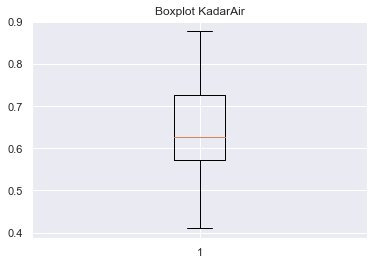

In [58]:
# H0 : |u1 = u2 + 0.2|
# H1 : |u1 > u2 + 0.2|
col = "KadarAir"
dataKA1 = data[col][0:250]
dataKA2 = data[col][250:500]

z_alpha = 0.842

nKA1 = len(dataKA1)
nKA2 = len(dataKA2)

sdKA1 = dataKA1.std()
sdKA2 = dataKA2.std()

xKA1 = dataKA1.mean()
xKA2 = dataKA2.mean()


z = (xKA1 - xKA2) / (sqrt( ((sdKA1**2)/nKA1) + ((sdKA2**2)/nKA2) ))

pval = 2*(norm.sf(abs(z)))

print("Z =", z)
print("P-values =", pval)

if(z > z_alpha):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

plt.figure()
plt.boxplot(data[col])
plt.title("Boxplot " + col)
plt.show()

# Soal 5.c

Z = -3.4577735622078336
P-values = 0.0005446589606626397
Hipotesis H0 diterima


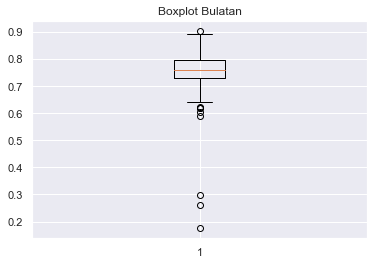

In [59]:
col = "Bulatan"

data1 = data[col][0:20]
data2 = data[col][479:500]

z_alpha = 1.729

n1 = len(data1)
n2 = len(data2)

sd1 = data1.std()
sd2 = data2.std()

X1 = data1.mean()
X2 = data2.mean()

z = (X1 - X2) / (sqrt( ((sd1**2)/n1) + ((sd2**2)/n2) ))
pval = 2*(norm.sf(abs(z)))

print("Z =", z)
print("P-values =", pval)

if(z > z_alpha):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

plt.figure()
plt.boxplot(data[col])
plt.title("Boxplot " + col)
plt.show()

# Soal 5.d

Z = 13.397486455610238
P-values = 6.254573593207953e-41
Hipotesis H0 ditolak


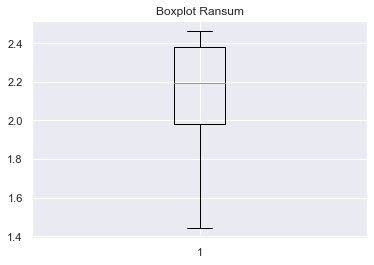

In [60]:
col = "Ransum"
data1 = data[col][0:250]
data2 = data[col][250:500]

data1 = data1[data1 > 2]
data2 = data2[data2 > 2]

z_alpha = 1.960

n1 = 250
n2 = 250

x1 = len(data1)
x2 = len(data2)

p1 = x1/n1
p2 = x2/n2

pBar = (x1 + x2) / (n1 + n2)

z = (p1 - p2) / (sqrt( pBar*(1-pBar) * ((1/n1) + (1/n2)) ))

pval = 2*(norm.sf(abs(z)))

print("Z =", z)
print("P-values =", pval)

if(z > z_alpha or z < -z_alpha):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

plt.figure()
plt.boxplot(data[col])
plt.title("Boxplot " + col)
plt.show()

# Soal 5.e

F = 1.083878022042188
P-values = 0.26278959201893937
Hipotesis H0 diterima


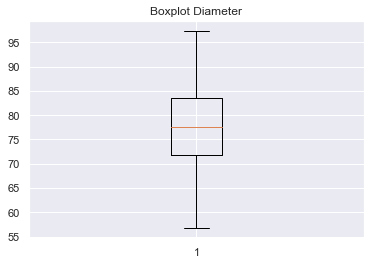

In [61]:
col = "Diameter"
data1 = data[col][0:250]
data2 = data[col][250:500]

f_alphaP2 = 1

var1 = data1.var()
var2 = data2.var()

f = var1/var2

dfn = len(data1) -1
dfd = len(data2) -1

pval = 1-stats.f.cdf(f, dfn, dfd)

print("F =", f)
print("P-values =", pval)

if(pval <= 0.05):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

plt.figure()
plt.boxplot(data[col])
plt.title("Boxplot " + col)
plt.show()

# Soal 6

In [ ]:
for att in attribute:
    if (att == "Kelas"):
        continue

    column_1 = data[att]
    column_2 = data["Kelas"]
    correlation = column_1.corr(column_2)
    print("Korelasi antara", att, "dan Kelas")
    print(correlation)
    
    corrTitle = "Scatter plot antara kolom"+ att+ " dan Kelas"
    data.plot.scatter(x=att, y='Kelas', title= corrTitle, color='DarkBlue')
    plt.show()
    print()

# Dummy (?)

In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y



for att in attribute:
    if (att == "Kelas"):
        continue
    x, y = ecdf(data[att])

    plt.figure()
    sns.set()
    plt.plot(x, y, marker=".", linestyle="none")
    plt.xlabel(att)
    plt.ylabel("Cumulative Distribution Function")
    
    samples = np.random.normal(np.mean(data[att]), np.std(data[att]), size=10000)
    x_theor, y_theor = ecdf(samples)
    plt.plot(x_theor, y_theor)
    plt.legend(('Normal Distribution', 'Empirical Data'), loc='lower right')
    
    print(stats.normaltest(data[att]))